In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('dengue_features_train.csv')
y_train = pd.read_csv('dengue_labels_train.csv')
X_test = pd.read_csv('dengue_features_test.csv')

X_train.head(), y_train.head(), X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

(  city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
 0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
 1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
 2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
 3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
 4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
 
     ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
 0  0.177617                 12.42             297.572857  ...   
 1  0.155486                 22.82             298.211429  ...   
 2  0.170843                 34.54             298.781429  ...   
 3  0.235886                 15.36             298.987143  ...   
 4  0.247340                  7.52             299.518571  ...   
 
    reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
 0                            32.00                             73.365714

# Data Visualization

In [3]:
# merge train data to perform data visualization
train_data = pd.merge(X_train, y_train, on=['city', 'year', 'weekofyear'])
train_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


<Axes: >

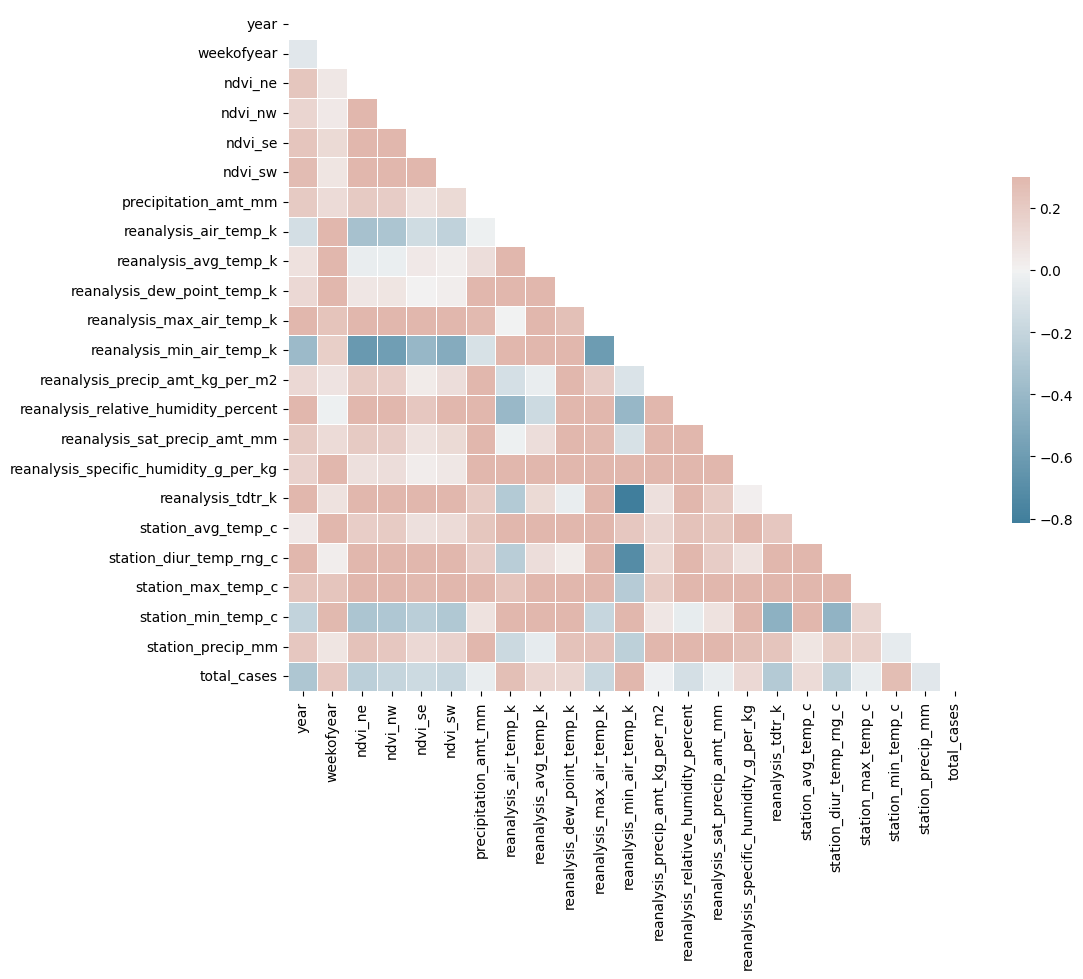

In [4]:
corr = train_data.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'Variable correlation with total cases')

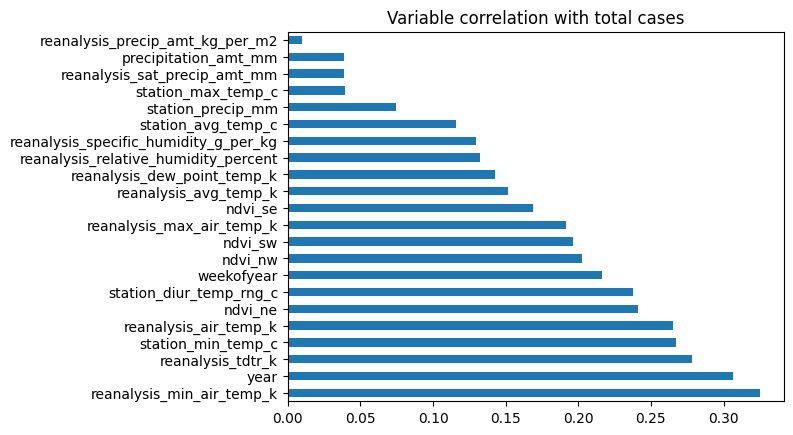

In [5]:
# display correlation matrix in number
corr['total_cases'].abs().drop("total_cases").sort_values(ascending=False).plot.barh()
plt.title('Variable correlation with total cases')

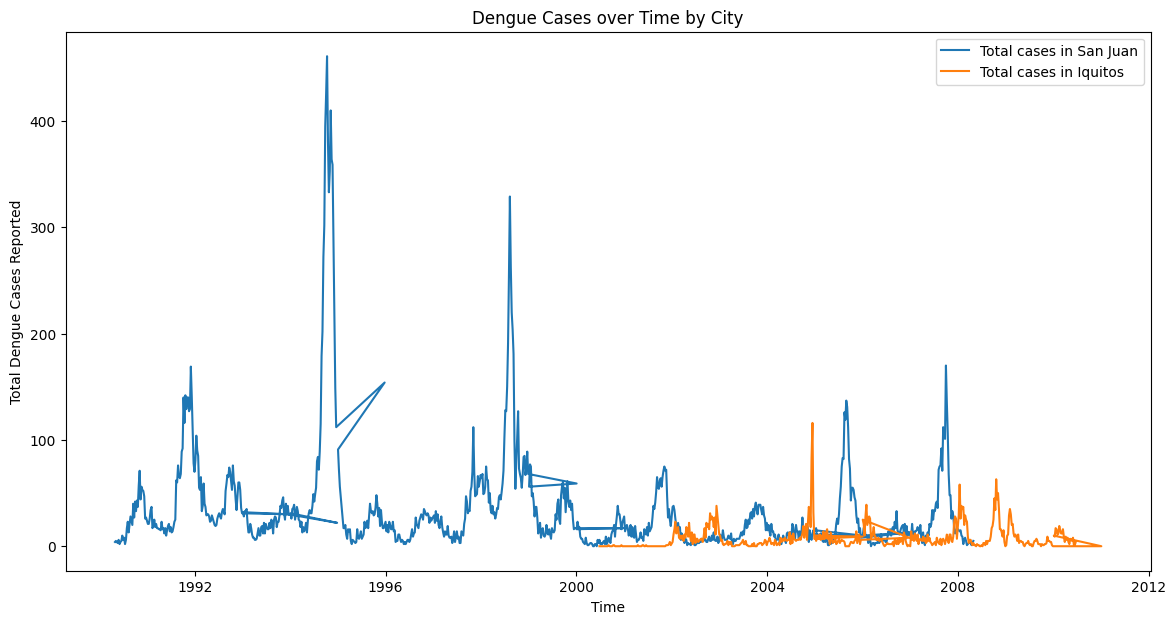

In [6]:
CITY_NAME = {
    "sj": "San Juan",
    "iq": "Iquitos"
}

# convert date to datetime object
def convert_date_to_datetime(year, week):
    return f"{int(year)}-W{int(week)}-1"

# apply to training data
train_data['date'] = train_data.apply(lambda row: convert_date_to_datetime(row['year'], row['weekofyear']), axis=1)
train_data['date'] = pd.to_datetime(train_data['date'], format="%Y-W%W-%w")

plt.figure(figsize=(14,7))
plt.xlabel('Time')
plt.ylabel('Total Dengue Cases Reported')
plt.title('Dengue Cases over Time by City')

for city in train_data['city'].unique():
    # filter the cities
    city_data = train_data[train_data['city'] == city]
    plt.plot(city_data['date'], city_data['total_cases'], label=f'Total cases in {CITY_NAME[city]}')
    
plt.legend()
plt.show()

# Data Preprocessing

In [7]:
def categorization(data):
    for col in ['city','year','weekofyear','week_start_date']:
        data[col] = data[col].astype('category')
    return data

X_train = categorization(X_train)

In [8]:
missing_values = pd.DataFrame({'Missing Values': X_train.isnull().sum(), 'Percentage': np.round((X_train.isnull().sum() / len(X_train)) * 100, 2)})
missing_values = missing_values[missing_values['Missing Values'] > 0].sort_values('Percentage', ascending=False)
missing_values

,Missing Values,Percentage
ndvi_ne,194,13.32
ndvi_nw,52,3.57
station_diur_temp_rng_c,43,2.95
station_avg_temp_c,43,2.95
station_precip_mm,22,1.51
ndvi_sw,22,1.51
ndvi_se,22,1.51
station_max_temp_c,20,1.37
station_min_temp_c,14,0.96
precipitation_amt_mm,13,0.89


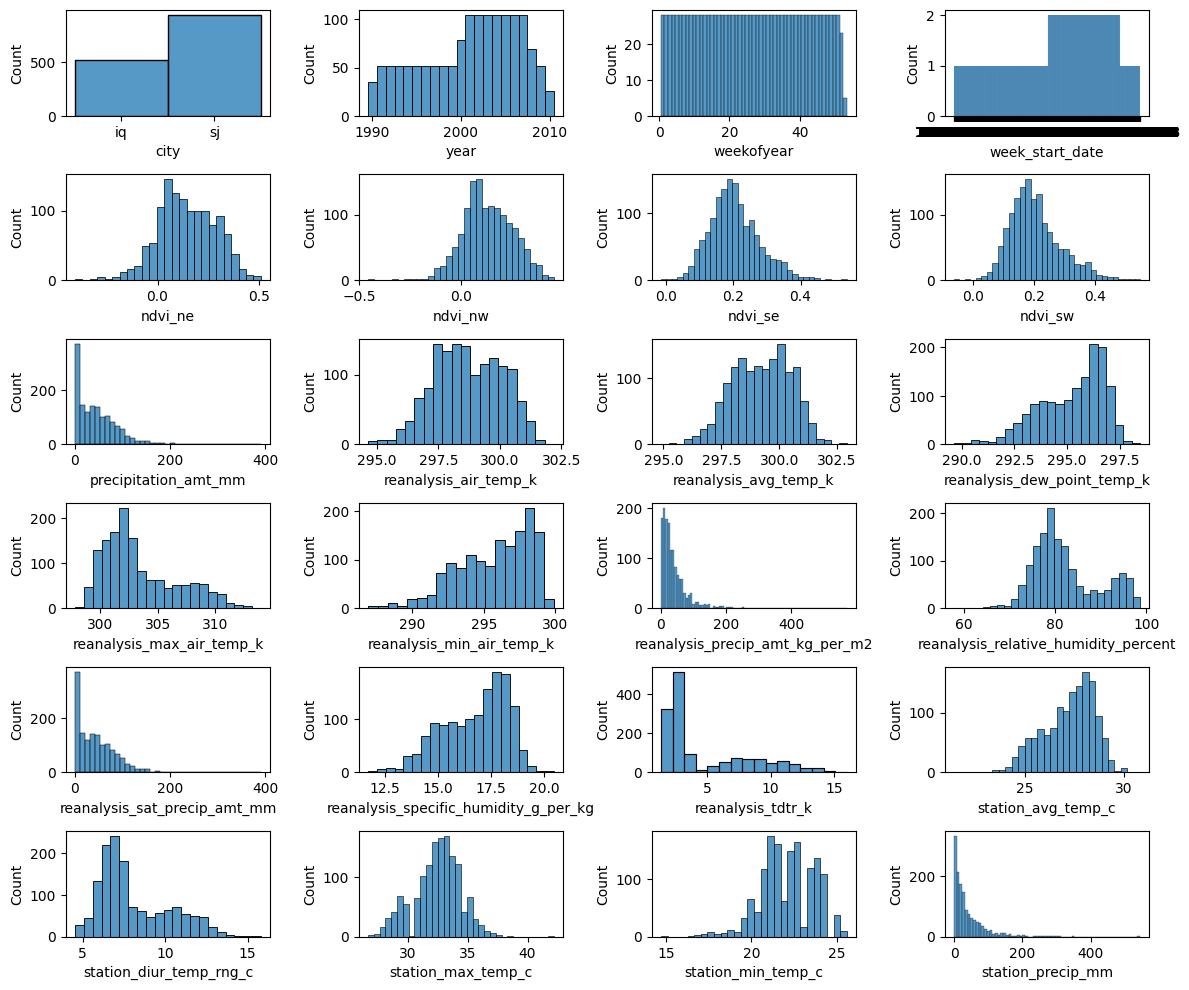

In [9]:
# plot the distribution in each feature
fix,ax = plt.subplots(6,4, figsize = (12,10))
c = 0
r = 0
for col in X_train.columns:
    if c > 3: #plot row col
        c = 0
        r += 1
    sns.histplot(data = X_train[col], ax = ax[r][c])
    c += 1
plt.tight_layout()

In [10]:
# Dealing with Missing Value with mean and median value
def missing_value_handle(data):
    missing_values_features = missing_values.index.tolist()
    for col in missing_values_features:
        if data[col].skew() < 1:
            data[col].fillna(data[col].mean(), inplace = True)
        else:
            data[col].fillna(data[col].median(), inplace = True)
        if col == 'ndvi_ne':
            # ndvi_ne is stewed with largest (13%) missing value, use median instead of mean
            data[col].fillna(data[col].median(), inplace=True)
    
    return data

X_full = missing_value_handle(X_train)
print("Maximum number of missing value: %s" % X_full.isnull().sum().max())

Maximum number of missing value: 0


In [11]:
def feature_engineering_with_lagged_rolling(df, feature_name, roll_window):
    df[f'{feature_name}_lag'] = df.groupby('city')[feature_name].shift(1)
    df[f'{feature_name}_rolling_mean'] = df.groupby('city')[feature_name].transform(lambda x: x.rolling(window=roll_window).mean())
    df[f'{feature_name}_rolling_std'] = df.groupby('city')[feature_name].transform(lambda x: x.rolling(window=roll_window).std())

def preprocess_data(X, y, key_features, rolling_window):
    X['week_start_date'] = pd.to_datetime(X['week_start_date'])
    for feature in key_features:
        feature_engineering_with_lagged_rolling(X, feature, rolling_window)
    cols_with_na = X.columns[X.isna().any()].tolist()
    X.drop(columns=cols_with_na, inplace=True)
    X.dropna(inplace=True)
    y = y.loc[X.index]

    return X, y


rolling_window = 4
key_features = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c',
                'reanalysis_min_air_temp_k', 'station_min_temp_c']
X_standarized, y_standarized = preprocess_data(X_full, y_train, key_features, rolling_window)


In [12]:
from sklearn.preprocessing import StandardScaler
def standardize_one_hot(data):
    scaler = StandardScaler()
    data_scaled = data.copy()
    data_scaled[[i for i in X_train.columns if type(X_train[i][0]) == np.float64]] = scaler.fit_transform(data_scaled[[i for i in X_train.columns if type(X_train[i][0]) == np.float64]]) # only columns with float type
    
    # One-hot encoding for city and week of year

    data_scaled = pd.concat([pd.get_dummies(data_scaled[['city','weekofyear']], drop_first=True), data_scaled.drop(['city','year','weekofyear','week_start_date'],axis = 1)], axis = 1)
    
    return data_scaled

# Now apply the function to the features_train dataset
X_train_scaled = standardize_one_hot(X_standarized)

X_train_scaled.shape


(1456, 73)

In [13]:
# Train Val splitting for validation
from sklearn.model_selection import train_test_split
X_train_scaled , X_val_scaled, y, y_val = train_test_split(X_train_scaled, y_standarized['total_cases'], test_size = 0.6, random_state = 12)

# Modelling (Regression)

In [14]:
# Benchmark model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [15]:
# Dictionary to store cross-validation results
cv_results = {}

# Linear Regression
lr_model = LinearRegression()
lr_scores_mse = cross_val_score(lr_model, X_train_scaled, y, cv=5, scoring='neg_mean_squared_error')
lr_scores_mae = cross_val_score(lr_model, X_train_scaled, y, cv=5, scoring='neg_mean_absolute_error')
cv_results['Linear Regression'] = {'mse':round(lr_scores_mse.mean() * -1,3),'mae':round(lr_scores_mae.mean() * -1,3)} # the result is negative because the algorithm try to minimize the error

# Ridge Regression
ridge_model = Ridge()
ridge_scores_mse = cross_val_score(ridge_model, X_train_scaled, y, cv=5, scoring='neg_mean_squared_error')
ridge_scores_mae = cross_val_score(ridge_model, X_train_scaled, y, cv=5, scoring='neg_mean_absolute_error')
cv_results['Ridge Regression'] = {'mse':round(ridge_scores_mse.mean() * -1,3),'mae':round(ridge_scores_mae.mean() * -1,3)} # the result is negative because the algorithm try to minimize the error

# Lasso Regression
lasso_model = Lasso()
lasso_scores_mse = cross_val_score(lasso_model, X_train_scaled, y, cv=5, scoring='neg_mean_squared_error')
lasso_scores_mae = cross_val_score(lasso_model, X_train_scaled, y, cv=5, scoring='neg_mean_absolute_error')
cv_results['Lasso Regression'] = {'mse':round(lasso_scores_mse.mean() * -1,3),'mae':round(lasso_scores_mae.mean() * -1,3)} # the result is negative because the algorithm try to minimize the error

# Decision Tree
dt_model = DecisionTreeRegressor(criterion='squared_error',random_state = 42)
dt_scores_mse = cross_val_score(dt_model, X_train_scaled, y, cv=5, scoring='neg_mean_squared_error')
dt_scores_mae = cross_val_score(dt_model, X_train_scaled, y, cv=5, scoring='neg_mean_absolute_error')
cv_results['Decision Tree Regression'] = {'mse':round(dt_scores_mse.mean() * -1,3),'mae':round(dt_scores_mae.mean() * -1,3)} # the result is negative because the algorithm try to minimize the error

# RandomForest
rf_model = RandomForestRegressor(criterion='squared_error', max_depth = 5 ,n_estimators=100, random_state=0)
rf_scores_mse = cross_val_score(rf_model, X_train_scaled, y, cv=5, scoring='neg_mean_squared_error')
rf_scores_mae = cross_val_score(rf_model, X_train_scaled, y, cv=5, scoring='neg_mean_absolute_error')
cv_results['Random Forest Regression'] = {'mse':round(rf_scores_mse.mean() * -1,3),'mae':round(rf_scores_mae.mean() * -1,3)} # the result is negative because the algorithm try to minimize the error



In [16]:
cv_results

{'Linear Regression': {'mse': 1710.273, 'mae': 21.421},
 'Ridge Regression': {'mse': 1672.476, 'mae': 20.58},
 'Lasso Regression': {'mse': 1649.373, 'mae': 18.776},
 'Decision Tree Regression': {'mse': 2849.761, 'mae': 24.3},
 'Random Forest Regression': {'mse': 1731.424, 'mae': 18.703}}

## Random Forest Regression perform the best in these model, so we decided to use this model

In [17]:
X_test_pred = categorization(X_test)
X_test_pred = missing_value_handle(X_test_pred)
X_test_scaled, y_train = preprocess_data(X_test_pred, y_train, key_features, rolling_window)
X_test_scaled = standardize_one_hot(X_test_scaled)

In [18]:
rf_model.fit(X_train_scaled,y)

y_test_pred = rf_model.predict(X_test_scaled)
y_test_pred = y_test_pred.astype(int)
y_test_pred

array([ 19,  23,  21,  25,  23,  24,  23,  29,  23,  27,  26,  30,  31,
        24,  45,  31,  37,  40, 311,  32,  34,  29,  35,  37,  30,  26,
        26,  55,  24,  28,  69,  28,  30,  26,  19,  21,  13,  33,  26,
        29,  16,  24,  23,  27,  20,  28,  20,  13,  21,  16,  18,  18,
        27,  18,  83,  45,  26,  21,  25,  30,  24,  29,  23,  27,  28,
        30,  51,  30,  33,  28, 327,  28,  27,  23,  31,  38,  46,  27,
        24,  36,  32,  26,  90,  26,  27,  32,  22,  21,  20,  18,  33,
        21,  30,  20,  21,  21,  27,  15,  13,  21,  22,  18,  20,  33,
        26,  24,  28,  32,  23,  87,  35,  27,  32,  53,  53,  64,  32,
        53,  33, 106,  46,  61,  53,  40,  49,  27,  27,  28,  38,  31,
        25,  27,  92,  20,  27,  55,  15,  18,  19,  33,  55,  27,  27,
        20,  20,  24,  22,  22,  23,  23,  20,  16,  20,  20,  23,  30,
        20,  50,  29,  31,  39,  29,  32,  72,  48,  49,  32,  44,  29,
        44,  35, 101,  36,  76,  47,  28,  43,  27,  34,  42,  2

In [19]:
prediction = pd.DataFrame(y_test_pred, columns=["total_cases"])

prediction.insert(0, 'city', X_test['city'])
prediction.insert(1, 'year', X_test['year'])
prediction.insert(2, 'weekofyear', X_test['weekofyear'])
prediction.reset_index()
prediction.to_csv('dengue_predictions.csv', index = False)
prediction

,city,year,weekofyear,total_cases
0,sj,2008,18,19
1,sj,2008,19,23
2,sj,2008,20,21
3,sj,2008,21,25
4,sj,2008,22,23
...,...,...,...,...
411,iq,2013,22,4
412,iq,2013,23,4
413,iq,2013,24,5
414,iq,2013,25,4


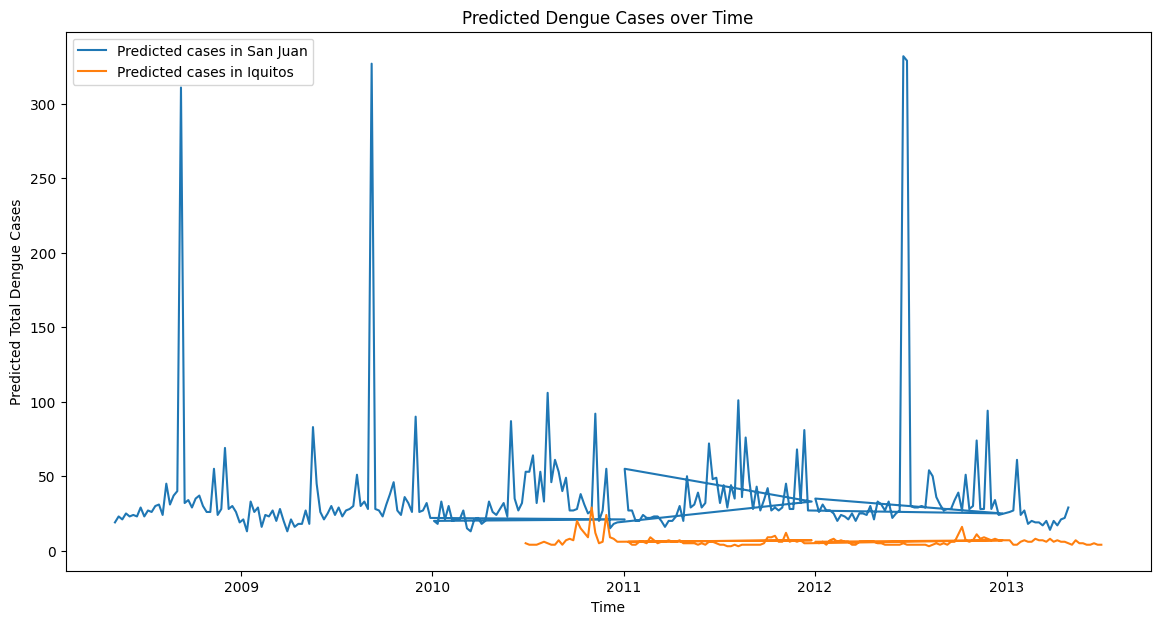

In [26]:
# pedicted total cases over time
plt.figure(figsize=(14,7))
plt.xlabel('Time')
plt.ylabel('Predicted Total Dengue Cases')
plt.title('Predicted Dengue Cases over Time')

# convert date format
prediction['date'] = prediction.apply(lambda row: convert_date_to_datetime(row['year'], row['weekofyear']), axis=1)
prediction['date'] = pd.to_datetime(prediction['date'], format="%Y-W%W-%w")

for city in prediction['city'].unique():
    city_data = prediction[prediction['city'] == city]
    plt.plot(city_data['date'], city_data['total_cases'], label=f'Predicted cases in {CITY_NAME[city]}')

plt.legend()
plt.show()


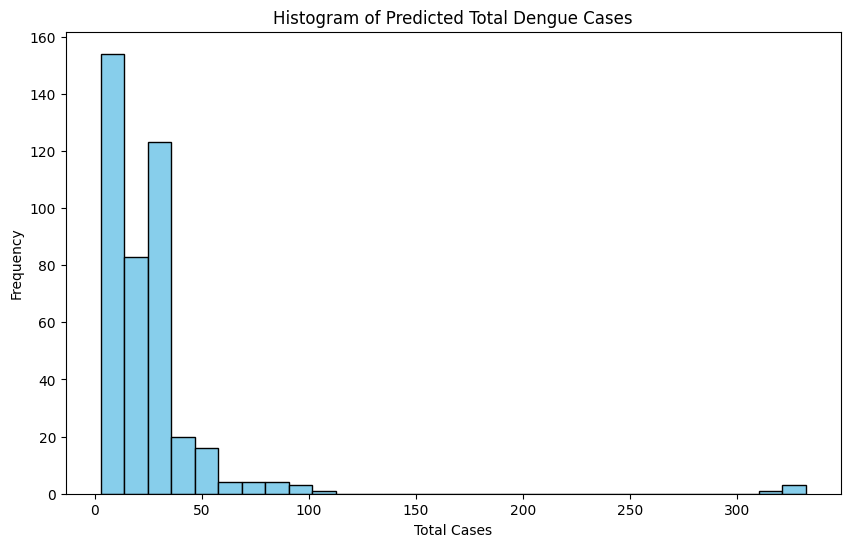

In [21]:
# Histogram of predicted cases
plt.figure(figsize=(10,6))
plt.hist(prediction['total_cases'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Total Dengue Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.show()


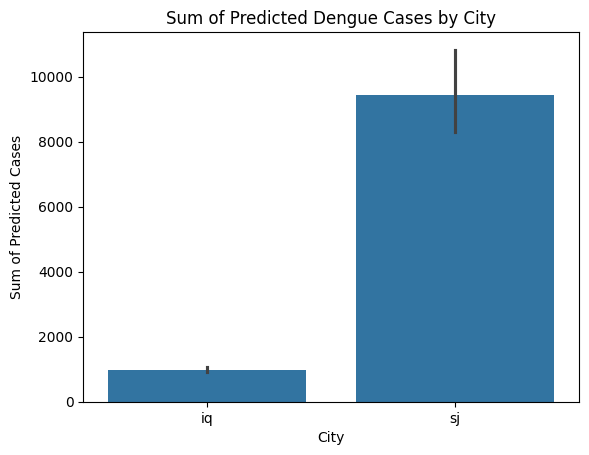

In [23]:
# Bar chart for predicted cases by city
sns.barplot(x='city', y='total_cases', data=prediction, estimator=sum)
plt.title('Sum of Predicted Dengue Cases by City')
plt.xlabel('City')
plt.ylabel('Sum of Predicted Cases')
plt.show()
